# Training session of Multiple Classifiers with ADNI Dataset
In this session, we will see the training of three simple CNN architectures using the preprocessed and augmented ADNI dataset. 

* The ADNI dataset used in the previous training of Single Classifier is splitted into three datasets.
* The Axial dataset consist of 63,147 images, the Coronnal dataset consist of 64,035 images and the Saggital dataset consist of 64,761 images.
* Each dataset is automatically split into training and validation set using the parameter - **validation split** of Image DataGenerator.

* It was observed that the models were able to gain the following accuracies:<br>
  1] Axial Classifier - 94%<br>
  2] Coronnal Classifier - 93%<br>
  3] Saggital Classifier - 94% 








### Import Datasets
Here the dataset is loaded using the google drive link which is then unzipped.

In [ ]:
#Load Axial dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1is0e9KTvo_fFBhEdfWxvoESCa1ZbKw0ctK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1is0e9KTvo_fFBhEWxvoESCa1ZbKw0ctK" -O AXIAL_DATASET && rm -rf /tmp/cookies.txt

#Load Coronnal dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UoPu6dsdcawwUqo1AMWmpy6AKb951AmkJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1UoPu6dFWawwUqo1AMWmpy6AKb951AmkJ" -O CORONNAL_DATASET && rm -rf /tmp/cookies.txt

#Load Saggital dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hBzdtXnZjXCNtNlsc2sGsTtKUSZK4jzUd7' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hBzdtXnZjXCNtNl3uGsTtKUSZK4jzUd7" -O SAGGITAL_DATASET && rm -rf /tmp/cookies.txt


In [ ]:
!unzip AXIAL_DATASET
!unzip CORONNAL_DATASET
!unzip SAGGITAL_DATASET


### Import Tensorflow and other necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import GlobalAveragePooling2D

import numpy as np 


import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Initialize necessary parameters of the model

In [ ]:
batch_size = 64
epochs = 35
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_LABELS = 3

In [ ]:
def plotImagesNumpy(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
      img = np.squeeze(img)
      ax.imshow(img)
      ax.axis('off')
    print("Shape of image: ", img.shape)
    plt.tight_layout()
    plt.show()

### Initialize train and validation data generators
Here the code remains the same for all three classifiers. Here all you need to do is to change the train directory (train_dir) accordingly.

In [ ]:
train_dir = '/content/Axial_Classifier_Dataset_60k '
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.1
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     color_mode="grayscale",
                                                     subset = 'training',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImagesNumpy(augmented_images)

val_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                 directory=train_dir,
                                                 shuffle = False,
                                                 color_mode="grayscale",
                                                 subset = 'validation',
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

augmented_images = [val_data_gen[0][0][0] for i in range(5)]
plotImagesNumpy(augmented_images)

### Set up Axial Classifier model

In [ ]:
axial_classifier = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(units=NUM_LABELS, activation='softmax')
])

#### Compile model and initialize training

In [ ]:
axial_classifier.compile(optimizer='adam',
                  loss="categorical_crossentropy",
                  metrics=['accuracy'])

axial_classifier.summary()

In [ ]:
history = axial_classifier.fit_generator(
    train_data_gen,
    steps_per_epoch=56834 // batch_size,
    epochs=35,
    validation_data=val_data_gen,
    validation_steps=6313 // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/35
888/888 [==============================] - 229s 258ms/step - loss: 1.0227 - accuracy: 0.4683 - val_loss: 0.9479 - val_accuracy: 0.5740
Epoch 2/35
888/888 [==============================] - 188s 211ms/step - loss: 0.8924 - accuracy: 0.5750 - val_loss: 0.7254 - val_accuracy: 0.6853
Epoch 3/35
888/888 [==============================] - 187s 210ms/step - loss: 0.6934 - accuracy: 0.6974 - val_loss: 0.5410 - val_accuracy: 0.7789
Epoch 4/35
888/888 [==============================] - 187s 211ms/step - loss: 0.4846 - accuracy: 0.8037 - val_loss: 0.4036 - val_accuracy: 0.8386
Epoch 5/35
888/888 [==============================] - 187s 210ms/step - loss: 0.3250 - accuracy: 0.8752 - val_loss: 0.3108 - val_accuracy: 0.8798
Epoch 6/35
888/888 [==============================] - 187s 210ms/step - loss: 0.2276 - accuracy: 0.9144 - val_loss: 0.2783 - val_accuracy: 0.8970
Epoch 7/35
888/888 [============================

#### Plot the graphs for Axial Classifer
Here the following graphs are plotted :
* Train & Validation Accuracy vs Epochs.
* Train & Validation Loss vs Epochs.

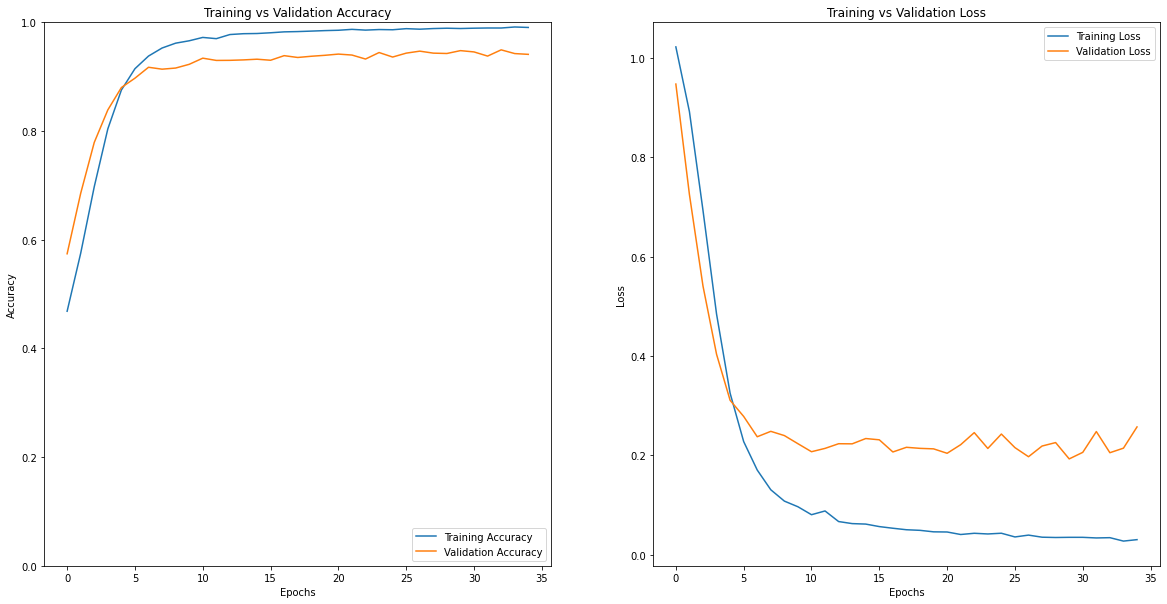

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=35
epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Train Coronnal Classifier
Setting up the train and validation generators as well as compiling the model remains the same as that of the axial classifier. This holds true for the saggital classifier as well.

In [ ]:
history = coronnal_classifier.fit_generator(
    train_data_gen,
    steps_per_epoch=57633 // batch_size,
    epochs=35,
    validation_data=val_data_gen,
    validation_steps=6402 // batch_size
)

Epoch 1/35
900/900 [==============================] - 227s 252ms/step - loss: 1.0230 - accuracy: 0.4790 - val_loss: 0.8833 - val_accuracy: 0.5853
Epoch 2/35
900/900 [==============================] - 220s 244ms/step - loss: 0.8969 - accuracy: 0.5780 - val_loss: 0.7472 - val_accuracy: 0.6734
Epoch 3/35
900/900 [==============================] - 219s 243ms/step - loss: 0.7231 - accuracy: 0.6822 - val_loss: 0.5688 - val_accuracy: 0.7739
Epoch 4/35
900/900 [==============================] - 219s 243ms/step - loss: 0.5549 - accuracy: 0.7696 - val_loss: 0.4583 - val_accuracy: 0.8136
Epoch 5/35
900/900 [==============================] - 219s 244ms/step - loss: 0.4189 - accuracy: 0.8346 - val_loss: 0.3716 - val_accuracy: 0.8561
Epoch 6/35
900/900 [==============================] - 223s 248ms/step - loss: 0.3151 - accuracy: 0.8780 - val_loss: 0.3376 - val_accuracy: 0.8723
Epoch 7/35
900/900 [==============================] - 224s 249ms/step - loss: 0.2456 - accuracy: 0.9072 - val_loss: 0.2959 -

#### Plot graphs

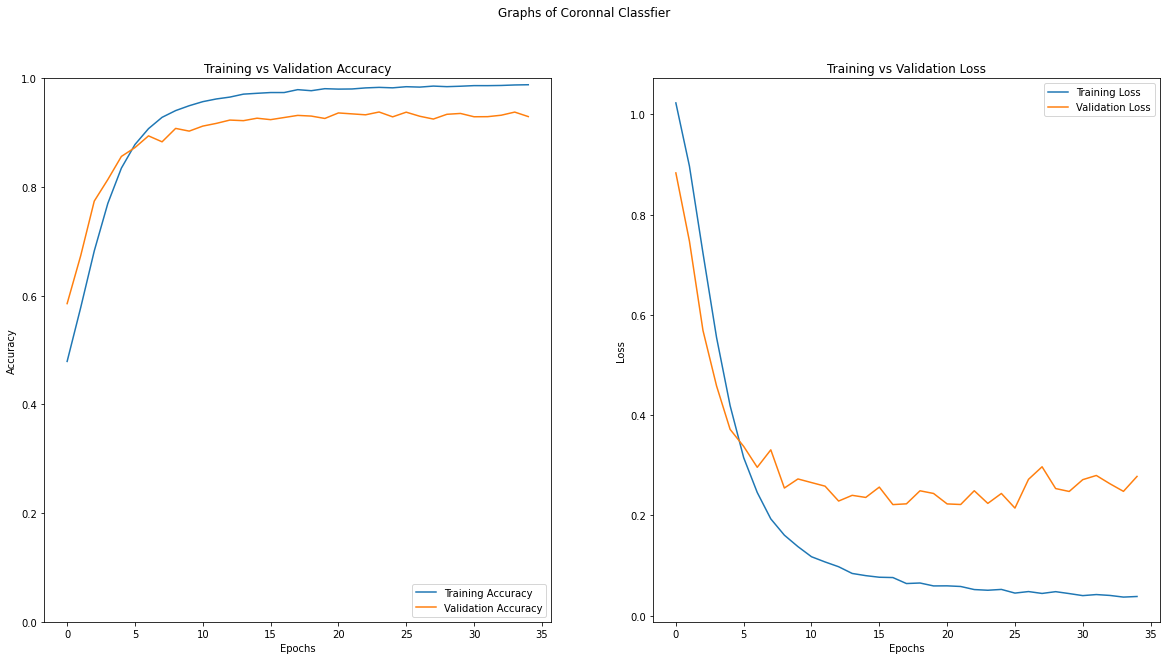

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=35
epochs_range = range(epochs)

fig=plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
fig.suptitle('Graphs of Coronnal Classfier')
plt.show()

### Train Saggital Classifier

In [ ]:
history = saggital_classifier.fit_generator(
    train_data_gen,
    steps_per_epoch=58286 // batch_size,
    epochs=35,
    validation_data=val_data_gen,
    validation_steps=6475 // batch_size
)

Epoch 1/35
910/910 [==============================] - 237s 260ms/step - loss: 1.0130 - accuracy: 0.4842 - val_loss: 0.8790 - val_accuracy: 0.5784
Epoch 2/35
910/910 [==============================] - 236s 260ms/step - loss: 0.8029 - accuracy: 0.6352 - val_loss: 0.6307 - val_accuracy: 0.7461
Epoch 3/35
910/910 [==============================] - 234s 257ms/step - loss: 0.5629 - accuracy: 0.7670 - val_loss: 0.4937 - val_accuracy: 0.8035
Epoch 4/35
910/910 [==============================] - 236s 259ms/step - loss: 0.3740 - accuracy: 0.8537 - val_loss: 0.3831 - val_accuracy: 0.8521
Epoch 5/35
910/910 [==============================] - 241s 265ms/step - loss: 0.2448 - accuracy: 0.9080 - val_loss: 0.3277 - val_accuracy: 0.8790
Epoch 6/35
910/910 [==============================] - 240s 264ms/step - loss: 0.1772 - accuracy: 0.9348 - val_loss: 0.3000 - val_accuracy: 0.8886
Epoch 7/35
910/910 [==============================] - 241s 265ms/step - loss: 0.1290 - accuracy: 0.9537 - val_loss: 0.2602 -

#### Plot graphs

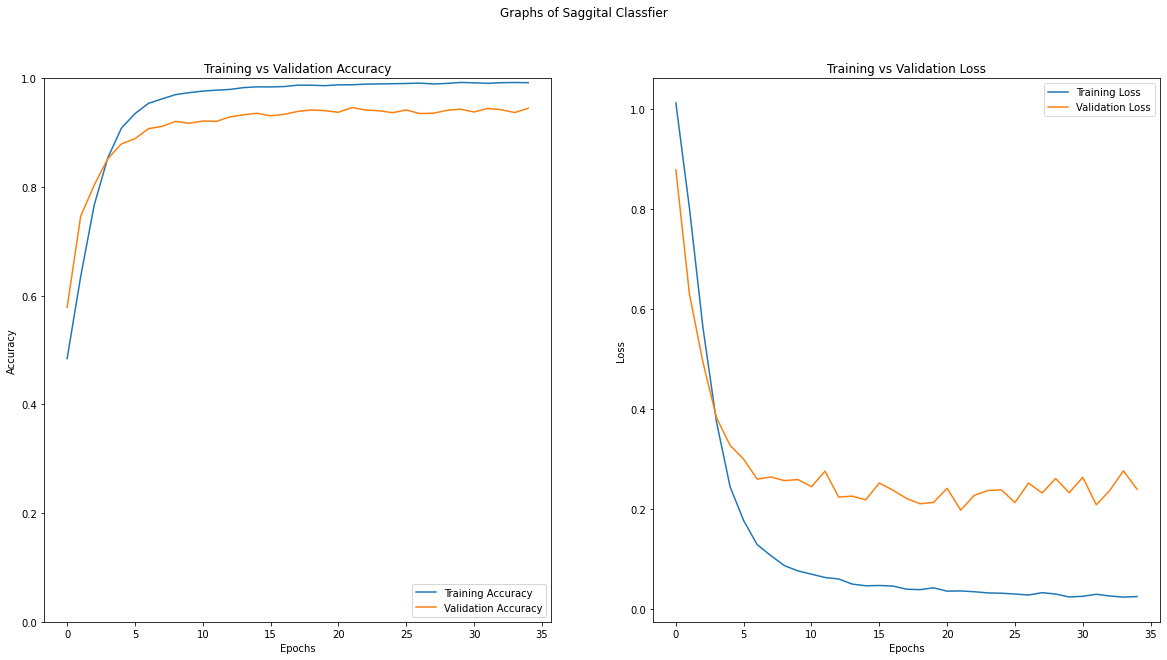

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=35
epochs_range = range(epochs)

fig=plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
fig.suptitle('Graphs of Saggital Classfier')
plt.show()

## Plotting graphs for three classifiers
#### Data size vs Accuracy & Loss

In order to understand the improvement of model with respect to the increase in data, the remaining two graphs are plotted and it is done in the following manner : 

* Validation dataset is kept constant. (0.1% of total data)
* Train dataset is gradually increased by changing the validation split.


Till now we have plotted only two types of graphs for each classifier. Now, in this session we will plot the rest two graphs for each classifier which is :
* Train & Validation Accuracy vs Training size.
* Train & Validation Loss vs Training size.


#### Import train and validation dataset



In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Yq6NsoPerefFTVCRRAqHnoSdx7ZZnwbo-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Yq6NsoPID4FTVCRRAqHnoSdx7ZZnwbo-" -O TRAIN && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1iGdM46HoaUndvsszd0XZ8tlFvavKSrwfg3D' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1iGdM46HoaUnIAm0XZ8tlFvavKSrwfg3D" -O VAL && rm -rf /tmp/cookies.txt


In [ ]:
!unzip TRAIN
!unzip VAL

##### Set up train and validation generators

In [ ]:
# create train and validation datasets
def create_dataset(val_split):
  train_dir = '/content/Axial_Classifier_Train'

  val_dir = '/content/Axial_Classifier_Val'

  image_gen_train = ImageDataGenerator(
      rescale=1./255,
      validation_split = val_split
      )
  
  # Note that for validation dataset, a seperate instance of Image DataGenerator is created.
  datagen = ImageDataGenerator(rescale=1./255)
  
  train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                       directory=train_dir,
                                                       shuffle=True,
                                                       color_mode="grayscale",
                                                       subset = 'training',
                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode='categorical')
  val_data_gen = datagen.flow_from_directory(batch_size=batch_size,
                                                     directory=val_dir,
                                                     shuffle = False,
                                                     color_mode="grayscale",
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
  return train_data_gen,val_data_gen


In [ ]:
# Study of training set size for a simple CNN Architecture

# evaluate  model
def evaluate_model(train_data_gen,val_data_gen,val_split):
	# variables
  batch_size = 64
  epochs = 30
  IMG_HEIGHT = 256
  IMG_WIDTH = 256
  NUM_LABELS = 3
  
  #create model
  classifier = Sequential([
                                   Conv2D(16, 3, padding='same', activation='relu', 
                                          input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
                                   MaxPooling2D(),
                                   Conv2D(32, 3, padding='same', activation='relu'),
                                   MaxPooling2D(),
                                   Conv2D(64, 3, padding='same', activation='relu'),
                                   MaxPooling2D(),
                                   Conv2D(128, 3, padding='same', activation='relu'),
                                   MaxPooling2D(),
                                   Dropout(0.4),
                                   Flatten(),
                                   Dense(512, activation='relu'),
                                   Dense(units=NUM_LABELS, activation='softmax')
                                   ])
  # compile model
  classifier.compile(optimizer='adam',
                             loss="categorical_crossentropy",
                             metrics=['accuracy'])
  total_size = 58286
  val_size = 6475

  #calculating steps_per_epoch and validation_steps
  steps = ((1-val_split)*total_size)//batch_size
  val_steps = (val_size)//batch_size

  #Initialize training
  trained_model = classifier.fit_generator(
      train_data_gen,
      steps_per_epoch=steps,
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=val_steps
      )

  return trained_model

In [ ]:
def evaluate_size(val_split):
  #Define and initialize variables
  validation_accuracy,accuracy,validation_loss,train_loss = list(),list(),list(),list()
  train_generator,val_generator = create_dataset(val_split)

  trained_model= evaluate_model(train_generator,val_generator,val_split)

  validation_accuracy.append(trained_model.history['val_accuracy'])
  accuracy.append(trained_model.history['accuracy'])
  validation_loss.append(trained_model.history['val_loss'])
  train_loss.append(trained_model.history['loss'])
  
  return validation_accuracy,accuracy,validation_loss,train_loss


In [ ]:
batch_size = 64
epochs = 30
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_LABELS = 3

#### Train Axial Classifier

In [ ]:
# Define dataset sizes to evaluate
sizes = [0.7,0.6,0.5,0.4,0.3,0.2,0.1] 

'''

 The values in variable 'sizes' are actually the validation splits.
 Say, initially the val_split = 0.7, then 30% of the data is taken for training which is
 then gradually increased as 40% -> 50% -> 60% -> 70% -> 80% -> 90% .

'''

# Define variables
final_validation_accuracy,final_train_accuracy,final_validation_loss,final_train_loss= list(), list(),list(), list()
for validation_split in sizes:
  # repeated evaluate model with training set size
  val_accuracy,train_acc,val_loss,loss = evaluate_size(validation_split)
  # summarize score for size
  mean_score = mean(val_accuracy)
  final_validation_accuracy.append(mean_score)
 
  mean_score_1 = mean(train_acc)
  final_train_accuracy.append(mean_score_1)
 
  mean_score_2 = mean(val_loss)
  final_validation_loss.append(mean_score_2)
 
  mean_score_3 = mean(loss)
  final_train_loss.append(mean_score_3)

Found 17051 images belonging to 3 classes.
Found 6313 images belonging to 3 classes.
Epoch 1/30
266/266 [==============================] - 72s 270ms/step - loss: 1.0773 - accuracy: 0.3958 - val_loss: 1.1521 - val_accuracy: 0.4255
Epoch 2/30
266/266 [==============================] - 72s 270ms/step - loss: 1.0150 - accuracy: 0.4694 - val_loss: 1.0537 - val_accuracy: 0.4595
Epoch 3/30
266/266 [==============================] - 72s 269ms/step - loss: 0.9243 - accuracy: 0.5559 - val_loss: 1.0347 - val_accuracy: 0.4928
Epoch 4/30
266/266 [==============================] - 71s 268ms/step - loss: 0.7636 - accuracy: 0.6656 - val_loss: 1.0403 - val_accuracy: 0.5367
Epoch 5/30
266/266 [==============================] - 71s 269ms/step - loss: 0.5854 - accuracy: 0.7611 - val_loss: 1.0663 - val_accuracy: 0.5625
Epoch 6/30
266/266 [==============================] - 72s 269ms/step - loss: 0.4161 - accuracy: 0.8416 - val_loss: 1.1282 - val_accuracy: 0.5928
Epoch 7/30
266/266 [=========================

#### Plot graphs for Axial Classifier

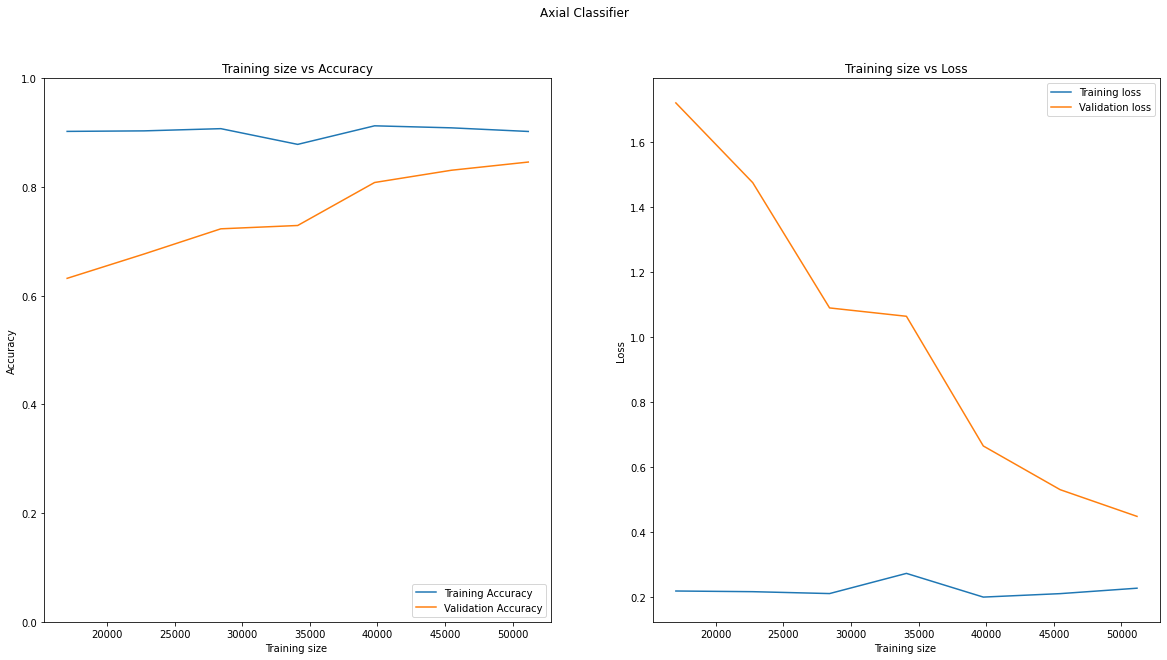

In [ ]:
# summarize relationship of train size to validation & train accuracy
import matplotlib.pyplot as plt


train_data_size = [17051,22736,28418,34101,39786,45469,51152]

fig=plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_data_size,final_train_accuracy, label='Training Accuracy ')
plt.plot(train_data_size,final_validation_accuracy, label='Validation Accuracy')
plt.ylim([0,1])
plt.xlabel('Training size ')
plt.ylabel('Accuracy')
loc = 'lower right'
plt.legend(loc=loc)
plt.title(f'Training size vs Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(train_data_size,final_train_loss, label='Training loss ')
plt.plot(train_data_size,final_validation_loss, label='Validation loss')
plt.xlabel('Training size ')
plt.ylabel('Loss')
loc = 'upper right'
plt.legend(loc=loc)
plt.title(f'Training size vs Loss')
fig.suptitle('Axial Classifier')
plt.show()

#### Train Coronnal Classifier

In [ ]:
# Define dataset sizes to evaluate
sizes = [0.7,0.6,0.5,0.4,0.3,0.2,0.1] 

'''

 The values in variable 'sizes' are actually the validation splits.
 Say, initially the val_split = 0.7, then 30% of the data is taken for training which is
 then gradually increased as 40% -> 50% -> 60% -> 70% -> 80% -> 90% .

'''

# Define variables
final_validation_accuracy,final_train_accuracy,final_validation_loss,final_train_loss= list(), list(),list(), list()
for validation_split in sizes:
  # repeated evaluate model with training set size
  val_accuracy,train_acc,val_loss,loss = evaluate_size(validation_split)
  # summarize score for size
  mean_score = mean(val_accuracy)
  final_validation_accuracy.append(mean_score)
 
  mean_score_1 = mean(train_acc)
  final_train_accuracy.append(mean_score_1)
 
  mean_score_2 = mean(val_loss)
  final_validation_loss.append(mean_score_2)
 
  mean_score_3 = mean(loss)
  final_train_loss.append(mean_score_3)

Found 17292 images belonging to 3 classes.
Found 6402 images belonging to 3 classes.
Epoch 1/30
270/270 [==============================] - 64s 239ms/step - loss: 1.0881 - accuracy: 0.3821 - val_loss: 1.0972 - val_accuracy: 0.3930
Epoch 2/30
270/270 [==============================] - 64s 237ms/step - loss: 1.0659 - accuracy: 0.4176 - val_loss: 1.0580 - val_accuracy: 0.4395
Epoch 3/30
270/270 [==============================] - 63s 234ms/step - loss: 1.0080 - accuracy: 0.4822 - val_loss: 1.0601 - val_accuracy: 0.4542
Epoch 4/30
270/270 [==============================] - 63s 233ms/step - loss: 0.9222 - accuracy: 0.5562 - val_loss: 1.0292 - val_accuracy: 0.5059
Epoch 5/30
270/270 [==============================] - 63s 234ms/step - loss: 0.7935 - accuracy: 0.6418 - val_loss: 1.0181 - val_accuracy: 0.5394
Epoch 6/30
270/270 [==============================] - 63s 234ms/step - loss: 0.6480 - accuracy: 0.7219 - val_loss: 1.0651 - val_accuracy: 0.5602
Epoch 7/30
270/270 [=========================

#### Plot graphs for Coronnal Classifier

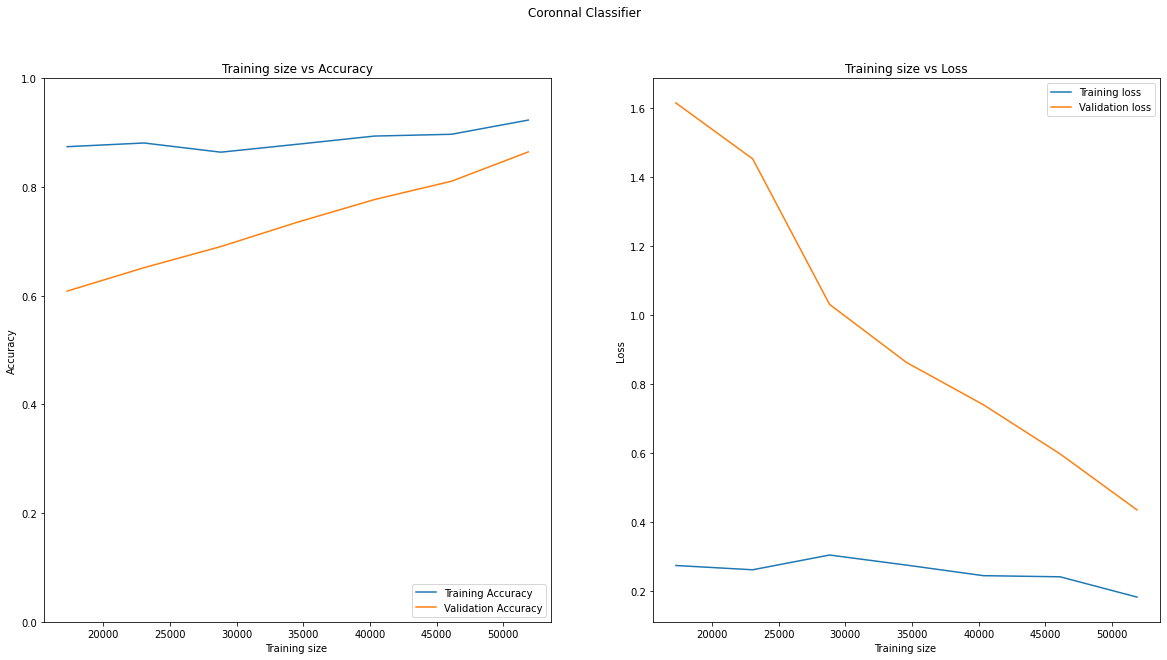

In [ ]:
# summarize relationship of train size to validation & train accuracy
import matplotlib.pyplot as plt


train_data_size = [17292,23054,28818,34581,40344,46107,51871]

fig=plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_data_size,final_train_accuracy, label='Training Accuracy ')
plt.plot(train_data_size,final_validation_accuracy, label='Validation Accuracy')
plt.ylim([0,1])
plt.xlabel('Training size ')
plt.ylabel('Accuracy')
loc = 'lower right'
plt.legend(loc=loc)
plt.title(f'Training size vs Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(train_data_size,final_train_loss, label='Training loss ')
plt.plot(train_data_size,final_validation_loss, label='Validation loss')
plt.xlabel('Training size ')
plt.ylabel('Loss')
loc = 'upper right'
plt.legend(loc=loc)
plt.title(f'Training size vs Loss')
fig.suptitle('Coronnal Classifier')
plt.show()

#### Train Saggital Classifier

In [ ]:
# Define dataset sizes to evaluate
sizes = [0.7,0.6,0.5,0.4,0.3,0.2,0.1] 

'''

 The values in variable 'sizes' are actually the validation splits.
 Say, initially the val_split = 0.7, then 30% of the data is taken for training which is
 then gradually increased as 40% -> 50% -> 60% -> 70% -> 80% -> 90% .

'''

# Define variables
final_validation_accuracy,final_train_accuracy,final_validation_loss,final_train_loss= list(), list(),list(), list()
for validation_split in sizes:
  # repeated evaluate model with training set size
  val_accuracy,train_acc,val_loss,loss = evaluate_size(validation_split)
  # summarize score for size
  mean_score = mean(val_accuracy)
  final_validation_accuracy.append(mean_score)
 
  mean_score_1 = mean(train_acc)
  final_train_accuracy.append(mean_score_1)
 
  mean_score_2 = mean(val_loss)
  final_validation_loss.append(mean_score_2)
 
  mean_score_3 = mean(loss)
  final_train_loss.append(mean_score_3)

Found 17487 images belonging to 3 classes.
Found 6475 images belonging to 3 classes.
Epoch 1/30
273/273 [==============================] - 92s 338ms/step - loss: 1.0854 - accuracy: 0.3928 - val_loss: 1.0890 - val_accuracy: 0.3858
Epoch 2/30
273/273 [==============================] - 91s 335ms/step - loss: 1.0364 - accuracy: 0.4603 - val_loss: 1.0539 - val_accuracy: 0.4486
Epoch 3/30
273/273 [==============================] - 91s 333ms/step - loss: 0.9315 - accuracy: 0.5567 - val_loss: 1.0608 - val_accuracy: 0.4862
Epoch 4/30
273/273 [==============================] - 91s 333ms/step - loss: 0.7911 - accuracy: 0.6429 - val_loss: 1.0425 - val_accuracy: 0.5319
Epoch 5/30
273/273 [==============================] - 89s 327ms/step - loss: 0.6148 - accuracy: 0.7426 - val_loss: 1.0666 - val_accuracy: 0.5588
Epoch 6/30
273/273 [==============================] - 89s 325ms/step - loss: 0.4541 - accuracy: 0.8189 - val_loss: 1.0929 - val_accuracy: 0.5879
Epoch 7/30
273/273 [=========================

#### Plot graphs for Saggital Classifier

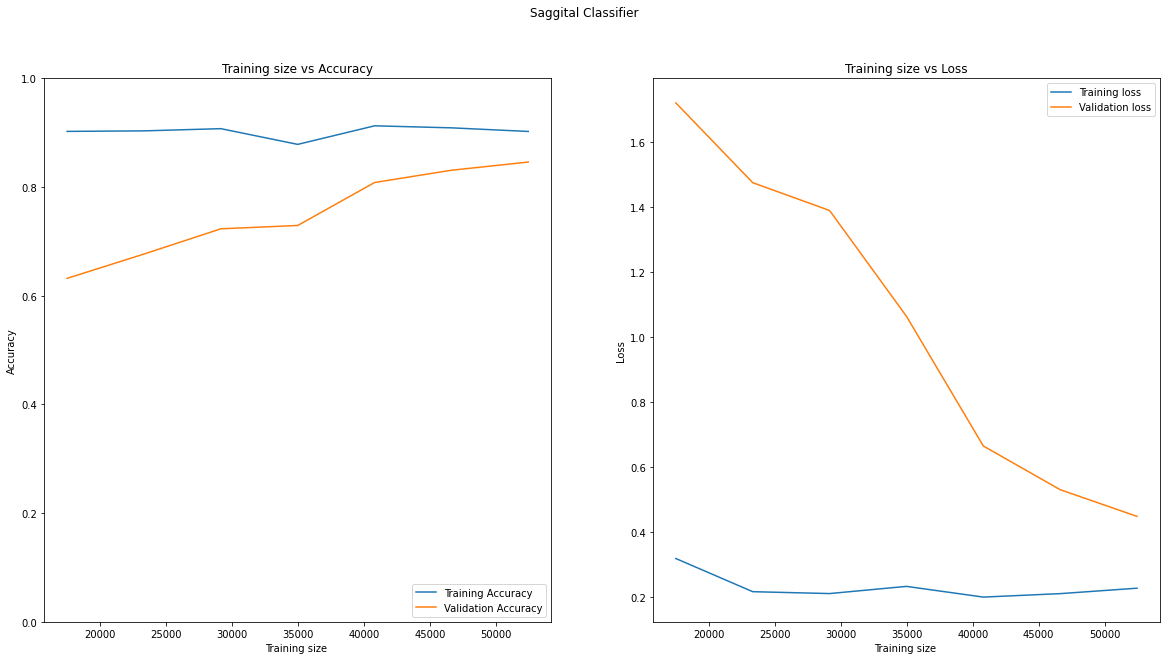

In [ ]:
# summarize relationship of train size to validation & train accuracy
import matplotlib.pyplot as plt


train_data_size = [17487,23316,29144,34972,40802,46628,52457]

fig=plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_data_size,final_train_accuracy, label='Training Accuracy ')
plt.plot(train_data_size,final_validation_accuracy, label='Validation Accuracy')
plt.ylim([0,1])
plt.xlabel('Training size ')
plt.ylabel('Accuracy')
loc = 'lower right'
plt.legend(loc=loc)
plt.title(f'Training size vs Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(train_data_size,final_train_loss, label='Training loss ')
plt.plot(train_data_size,final_validation_loss, label='Validation loss')
plt.xlabel('Training size ')
plt.ylabel('Loss')
loc = 'upper right'
plt.legend(loc=loc)
plt.title(f'Training size vs Loss')
fig.suptitle('Saggital Classifier')
plt.show()